<a href="https://colab.research.google.com/github/yravindra/facedetection/blob/master/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import PIL.Image
import PIL.ImageDraw
import dlib
from PIL import Image,ImageDraw
import face_recognition
from google.colab import files
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import  Image
from PIL import  ImageDraw


# Accessing My Google Drive


In [2]:
!pip install face_recognition


     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=00984e9716604d839e1ec1434c289a48551b561b226925ca29404df626bdb57b
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
#face detection 
# def loadImages(path):
#     '''Put files into lists and return them as one list with all images 
#      in the folder'''
#     image_files = sorted([os.path.join(path, 'train', file)
#                           for file in os.listdir(path + "/train")
#                           if file.endswith('.png')])
#     return image_files

# imagepath = loadImages()
#load the jpg file into numpy array   
image = face_recognition.load_image_file("/content/sample_data/people.jpg")
#find all the faces in the image 
face_locations = face_recognition.face_locations(image)
# c number of face in the image 
number_of_faces = len(face_locations)
print("I found {} face(s) in this photograph.".format(number_of_faces))

#Load the image into a python Image Libraray  object so that we can  draw on top 
pil_image = PIL.Image.fromarray(image)
draw = PIL.ImageDraw.Draw(pil_image)


for face_location in face_locations:
      # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order
      top,right,bottom,left = face_location
      print("A face is located at pixel location Top:{},Left:{},Bottom:{},Right:{}".format(top,left,bottom,right))
      #Let's Draw a box around  the face 
      draw.rectangle([left,top,right,bottom],outline="red")

#Display the image on screen 

pil_image.show()


I found 6 face(s) in this photograph.
A face is located at pixel location Top:163,Left:497,Bottom:271,Right:605
A face is located at pixel location Top:186,Left:275,Bottom:275,Right:364
A face is located at pixel location Top:211,Left:67,Bottom:319,Right:175
A face is located at pixel location Top:295,Left:653,Bottom:402,Right:760
A face is located at pixel location Top:271,Left:366,Bottom:378,Right:474
A face is located at pixel location Top:152,Left:724,Bottom:259,Right:832


In [0]:
print(face_locations)

[(163, 605, 271, 497), (186, 364, 275, 275), (211, 175, 319, 67), (295, 760, 402, 653), (271, 474, 378, 366), (152, 832, 259, 724)]


In [0]:
#face land mark recognition  
image_land = face_recognition.load_image_file("/content/sample_data/people.jpg")

#find the all facial feature in all the faces in the images 
face_landmarks_list = face_recognition.face_landmarks(image_land)

#finding the number of the images  in the list 
number_of_faces_landmark = len(face_landmarks_list)

print("I found {} face(s) in this photograph.".format(number_of_faces_landmark))
#load the image into python image file libarary obeject so that  we can draw on the top 
pil_image = PIL.Image.fromarray(image_land)

#Create a PIL drawing object to be able to draw lines later 
draw = PIL.ImageDraw.Draw(pil_image)
#loop over each facial feature ()
for face_landmarks in face_landmarks_list:
  for name,list_of_points in face_landmarks.items():
    print("The {} in this face has the following points:{}".format(name,list_of_points))
    draw.line(list_of_points,fill="red",width=2)


# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

display_one(pil_image)

I found 6 face(s) in this photograph.
The chin in this face has the following points:[(497, 193), (498, 206), (499, 219), (500, 232), (504, 244), (512, 255), (521, 264), (532, 271), (544, 274), (557, 272), (569, 266), (579, 258), (588, 247), (593, 234), (596, 221), (597, 208), (598, 194)]
The left_eyebrow in this face has the following points:[(508, 186), (514, 182), (520, 179), (528, 179), (536, 181)]
The right_eyebrow in this face has the following points:[(558, 180), (566, 179), (574, 179), (582, 180), (588, 186)]
The nose_bridge in this face has the following points:[(547, 191), (546, 200), (546, 208), (545, 217)]
The nose_tip in this face has the following points:[(536, 221), (541, 223), (546, 225), (551, 223), (556, 221)]
The left_eye in this face has the following points:[(517, 193), (522, 190), (528, 190), (533, 193), (527, 194), (522, 194)]
The right_eye in this face has the following points:[(562, 193), (567, 190), (573, 190), (578, 193), (573, 194), (567, 194)]
The top_lip i

In [0]:
#face encoding model code 
image_encoding = face_recognition.load_image_file("/content/sample_data/person2.png")
#genrating the face encodings
face_encoding = face_recognition.face_encodings(image_encoding)

if(len(face_encoding)==0):
  print("you dont have any person similar to this person")
else:
  #grab the first face encoding 
  first_face_encoding = face_encoding[0]
  #print the result
  print(first_face_encoding)



[-3.26377712e-03  7.94689804e-02  5.80458120e-02 -5.79938404e-02
 -1.72667399e-01  3.28100137e-02 -5.06189167e-02 -1.42689556e-01
  1.70358017e-01 -6.29137605e-02  3.23670328e-01 -1.02984853e-01
 -2.09157392e-01 -4.62254435e-02  1.26105696e-02  7.87239894e-02
 -1.49928793e-01 -1.02184355e-01 -6.17962796e-03 -8.67726132e-02
  1.08045071e-01  1.13098405e-01  6.50096685e-04 -9.99948010e-03
 -1.32999048e-01 -3.02664012e-01 -1.04714386e-01 -1.32422984e-01
  1.70418352e-01 -7.06224293e-02  3.07826605e-02  8.15370902e-02
 -1.59978628e-01 -8.24953690e-02  3.48323882e-02 -3.77645418e-02
 -1.09672010e-01 -7.21320137e-02  1.84596673e-01 -5.51346131e-03
 -1.81504369e-01 -7.22384453e-02  2.05350816e-02  1.93359584e-01
  9.02286917e-02  2.95058563e-02  5.18783405e-02 -7.94474259e-02
  4.31035087e-02 -2.27743745e-01  4.11492661e-02  1.76978722e-01
  1.02088094e-01 -1.02072954e-06  1.14917941e-01 -1.59087002e-01
 -7.35853147e-03  1.61077991e-01 -1.67199805e-01  1.50417745e-01
  1.24399066e-01 -9.55460

In [0]:
#face recognition system  
#load the images 
image_of_person1 = face_recognition.load_image_file("/content/sample_data/person_1.jpg")
image_of_person2 = face_recognition.load_image_file("/content/sample_data/person_2.jpg")
image_of_person3 = face_recognition.load_image_file("/content/sample_data/person_3.jpg")

#get the face encoding of each person .This can if no one is found 
person_1_face_encoding = face_recognition.face_encodings(image_of_person1)[0]
person_2_face_encoding = face_recognition.face_encodings(image_of_person2)[0]
person_3_face_encoding = face_recognition.face_encodings(image_of_person3)[0]


#create the list of all the know face of encoding 
known_face_encodings = [
                       person_1_face_encoding,
                       person_2_face_encoding,
                       person_3_face_encoding
]

#load the image we want to check 
unknown_image = face_recognition.load_image_file("/content/sample_data/unknown_4.jpg")
unknown_image_encodings = face_recognition.face_encodings(unknown_image)
print("ecodnigs",person_1_face_encoding)
#There are the might be more than one person in the photo ,so we neeed to loop over  each face we found.
for unknown_face_encoding in unknown_image_encodings:
  result = face_recognition.compare_faces(known_face_encodings,unknown_face_encoding,tolerance=0.6)
  name = "unkonwn"
  if result[0]:
    name ="Person1"
  elif result[1]:
    name = "Person2"
  elif result[3]:
    name = "Person3"
print(f"Found the {name} in the photo!")


ecodnigs [-1.21599324e-01  2.58645210e-02  1.03641808e-01 -1.03552707e-01
 -1.10634521e-01 -3.85044441e-02  3.56080011e-04 -6.07901327e-02
  1.96002692e-01 -1.73807323e-01  1.98144346e-01 -5.09199128e-02
 -1.45644441e-01  3.24478112e-02 -5.55986799e-02  2.46766880e-01
 -1.45866483e-01 -1.36574149e-01 -6.38571009e-02 -1.23729445e-01
 -3.76427770e-02 -1.00629907e-02  3.08628865e-02  1.77302659e-01
 -9.24702212e-02 -3.36816937e-01 -7.46231824e-02 -8.50740895e-02
  4.97743767e-03 -9.17778164e-02 -9.64255072e-03  1.34384677e-01
 -2.53169149e-01  2.72017773e-02 -3.80300917e-02  1.18446432e-01
  1.84719097e-02 -7.01441467e-02  8.94314498e-02  4.49470393e-02
 -2.42769822e-01 -6.88361600e-02  2.13776678e-02  2.71462679e-01
  2.18737602e-01 -1.12367012e-01 -2.34918483e-03 -4.16985638e-02
  1.35063045e-02 -2.06458643e-01 -1.78441536e-02  4.73509952e-02
  4.71367314e-02  5.64071536e-02 -3.63615453e-02 -1.11835212e-01
  5.24802953e-02  7.98514485e-02 -1.01878002e-01 -2.89066918e-02
  3.94381955e-03

In [10]:
#image recognizaation  tunning  
#if the image size is small its pixel quality is not too good then we are tunning feature 
#load the know Images 
image_of_person1 =  face_recognition.load_image_file("/content/sample_data/person_1.jpg")
image_of_person2 = face_recognition.load_image_file("/content/sample_data/person_2.jpg")
image_of_person3 = face_recognition.load_image_file("/content/sample_data/person_3.jpg")

#get the face of encoding of the each person ,This can fail if no one is found in the photo
person_1_face_encoding  = face_recognition.face_encodings(image_of_person1)[0]
person_2_face_encoding = face_recognition.face_encodings(image_of_person2)[0]
person_3_face_encoding = face_recognition.face_encodings(image_of_person3)[0]

#create the list of know face encoding 
known_face_encodings = [
                        person_1_face_encoding,
                        person_2_face_encoding,
                        person_3_face_encoding
                        
]

#load the images we want to check 
unknown_image = face_recognition.load_image_file("/content/sample_data/unknown_8.jpg")

#Get face encodings for any people in the picture 
face_location = face_recognition.face_locations(unknown_image,number_of_times_to_upsample=2)
unknown_face_encodings = face_recognition.face_encodings(unknown_image,known_face_locations=face_location)

#There might be more than one person in the photo, so we need to loop over each face we found 
for unknown_face_encoding in unknown_face_encodings:
  results  = face_recognition.compare_faces(known_face_encodings,unknown_face_encoding,tolerance=2)
  name = "unknown"

  if results[0]:
    name ="Person1"
  elif results[0]:
    name = "Person2"
  elif results[0]:
    name = "Preson3"

  print(f"Found  {name} in the Phtoto!")



Found  Person1 in the Phtoto!


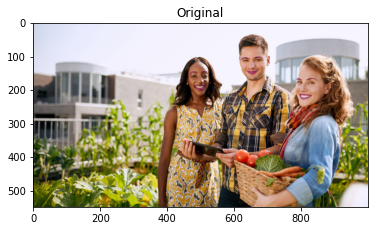

In [20]:
# Digital make up file code
#load the jpg file into numpy array 
image = face_recognition.load_image_file("/content/sample_data/unknown_2.jpg")

#find all the facial feature in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

#Load the image into a Python Image Library so that we can draw top of it and display it 
pil_image = Image.fromarray(image)

#Create the PIL drawing object to be able to draw line later 
d = ImageDraw.Draw(pil_image,"RGBA")

for face_landmarks in face_landmarks_list:
  #the face landmark model return these featurre 
  #chin,left_eyebrow ,right_eyebrow,nose_bridge,nose_tip,left_eye,right_eye,top_lip,bottom_lip
  #Draw a line over the eyebrow ,
  d.line(face_landmarks['left_eyebrow'],fill=(128,0,128,100),width=3)
  d.line(face_landmarks['right_eyebrow'],fill=(128,0,128,100),width =3)

  #draw over the lips 
  d.polygon(face_landmarks['top_lip'],fill =(128,0,128.100),width = 3)
  d.polygon(face_landmarks[bottom_lip],fill =(128,0,128,100),width = 3)

#show the final image 
pil_image.show


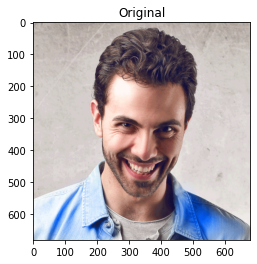

In [38]:
# Load the image of the person we want to find similar people for
known_image = face_recognition.load_image_file("/content/sample_data/test_face.jpg")

# Encode the known image
known_image_encoding = face_recognition.face_encodings(known_image)[0]

# Variables to keep track of the most similar face match we've found
best_face_distance = 1.0
best_face_image = None

for image_path in Path("/content/sample_data/people/").glob("*.png"):
  #load an image to check 
  unknown_image = face_recognition.load_image_file(image_path)
  # print(unknown_image)
  #Get the location of faces and face encoding for the current image 
  face_encodings = face_recognition.face_encodings(unknown_image)
  #geting the face distance between the know person and all the faces in the image 
  face_distance = face_recognition.face_distance(face_encodings,known_image_encoding)[0]
  
  # if face is more similar to our know image  than we have seen so far,save it 
  if face_distance < best_face_distance:
    #save the new best face distnace 
    best_face_distance = face_distance
    best_face_image =  unknown_image 

#Display the face image that we found best match 
pil_image = Image.fromarray(best_face_image)
# Display one image
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

display_one(pil_image)

